# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# data loading
fraud_df = pd.read_csv("https://raw.githubusercontent.com/elvinojunior/dicoding_machine_learning_pemula/refs/heads/main/Dataset_inisiasi.csv")
fraud_df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# identifikasi dataset
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

dataframe fraud_df memiliki 2512 baris, dengan 16 kolom :

*   fitur object/string :
TransactionID, AccountID, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation
*   fitur numerik :
TransactionAmount, CustomerAge, TransactionDuration , LoginAttempt, AccountBalance
*   fitur waktu yang perlu diubah :
TransactionDate, PreviousTransactionDate.

Mari kita ubah...

In [ ]:
# mengubah tipe data time series
fraud_df['TransactionDate'] = pd.to_datetime(fraud_df['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
fraud_df['PreviousTransactionDate'] = pd.to_datetime(fraud_df['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [ ]:
# identifikasi missing values
fraud_df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Tidak ada missing values atau nilai yang kosong pada Dataframe

In [ ]:
# identifikasi statistik deskriptif
fraud_df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


Ringkasan statistik deskriptif pada fitur numerik :
* TransactionAmount :

Rata-rata: $297.59

Mayoritas transaksi berada di bawah $414.52 (Q3)
* CustomerAge :

Rata-rata: 44.67 tahun

Rentang usia: 18 - 80 tahun

Mayoritas pelanggan berusia di sekitar 45 tahun (median)

* TransactionDuration :

Rata-rata: 119.64 detik

Transaksi tercepat: 10 detik, terlama: 300 detik

* LoginAttempts :

Rata-rata: 1.12 kali

Beberapa akun memiliki 5 kali percobaan login, yang bisa menjadi indikasi aktivitas mencurigakan

* AccountBalance :

Rata-rata: $5,114.30

Rentang saldo: $101.25 -$14,977.99

Banyak akun dengan saldo di bawah $7,678.82 (Q3)

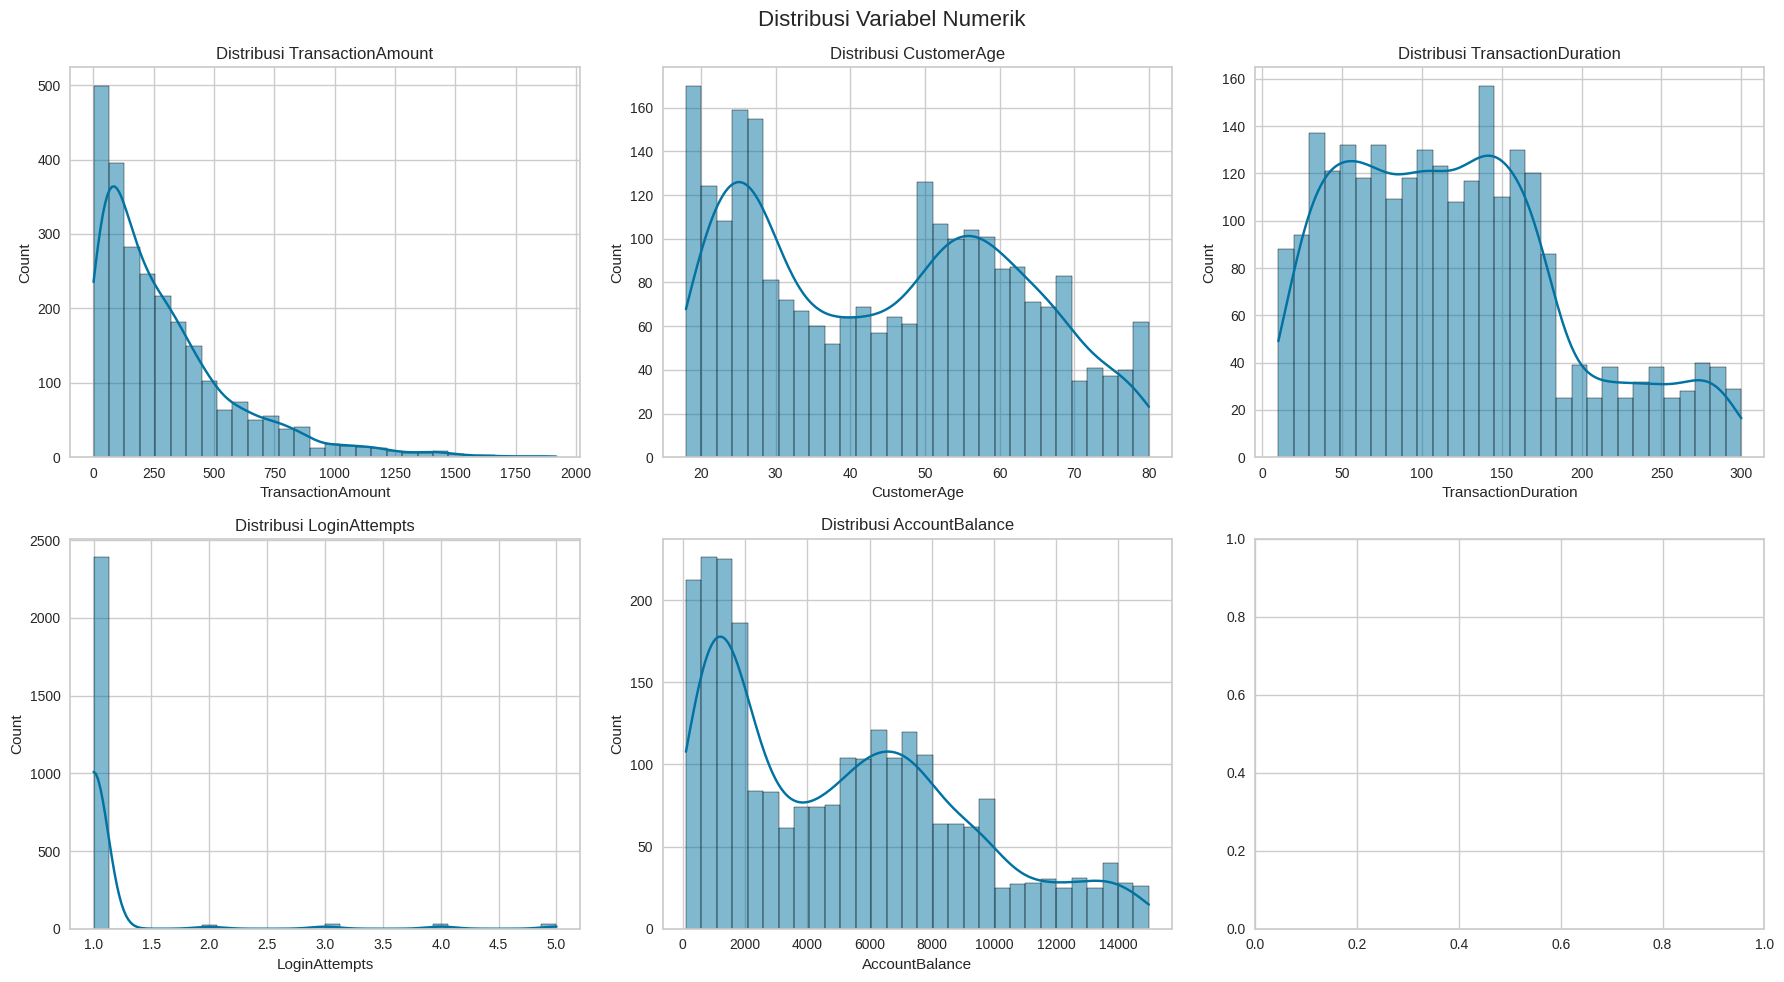

In [ ]:
# distribusi data fitur numerik menggunakan histogram
numeric_columns = fraud_df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribusi Variabel Numerik", fontsize=16)

for i, col in enumerate(numeric_columns):
    row, col_idx = divmod(i, 3)
    sns.histplot(fraud_df[col], bins=30, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

Visualisasi fitur numerik untuk memudahkan melihat sebaran pada Dataframe

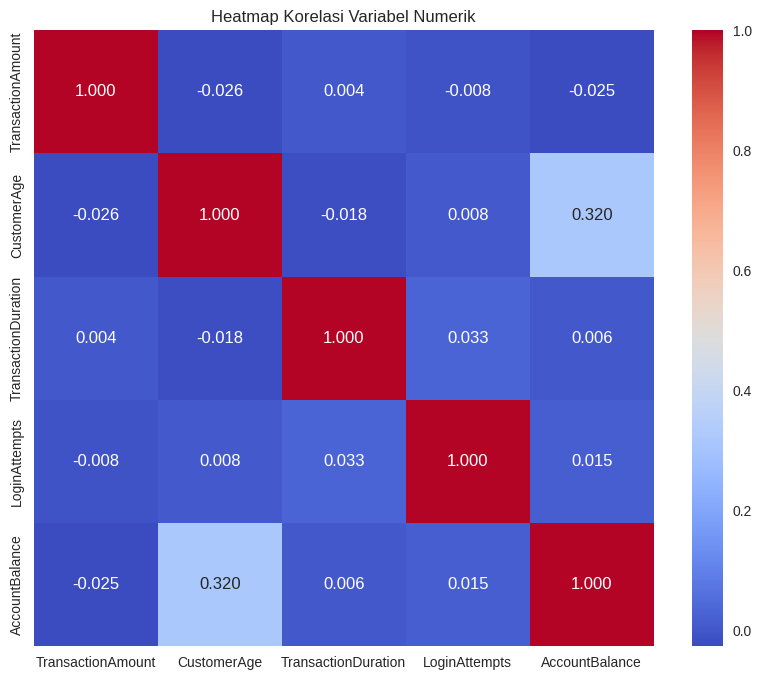

In [ ]:
# heatmap untuk menganalisis korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(fraud_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

Heatmap dari matriks korelasi pada fitur numerik. pada fitur Account balance vs CustomerAge menunjukan korelasi paling tinggi

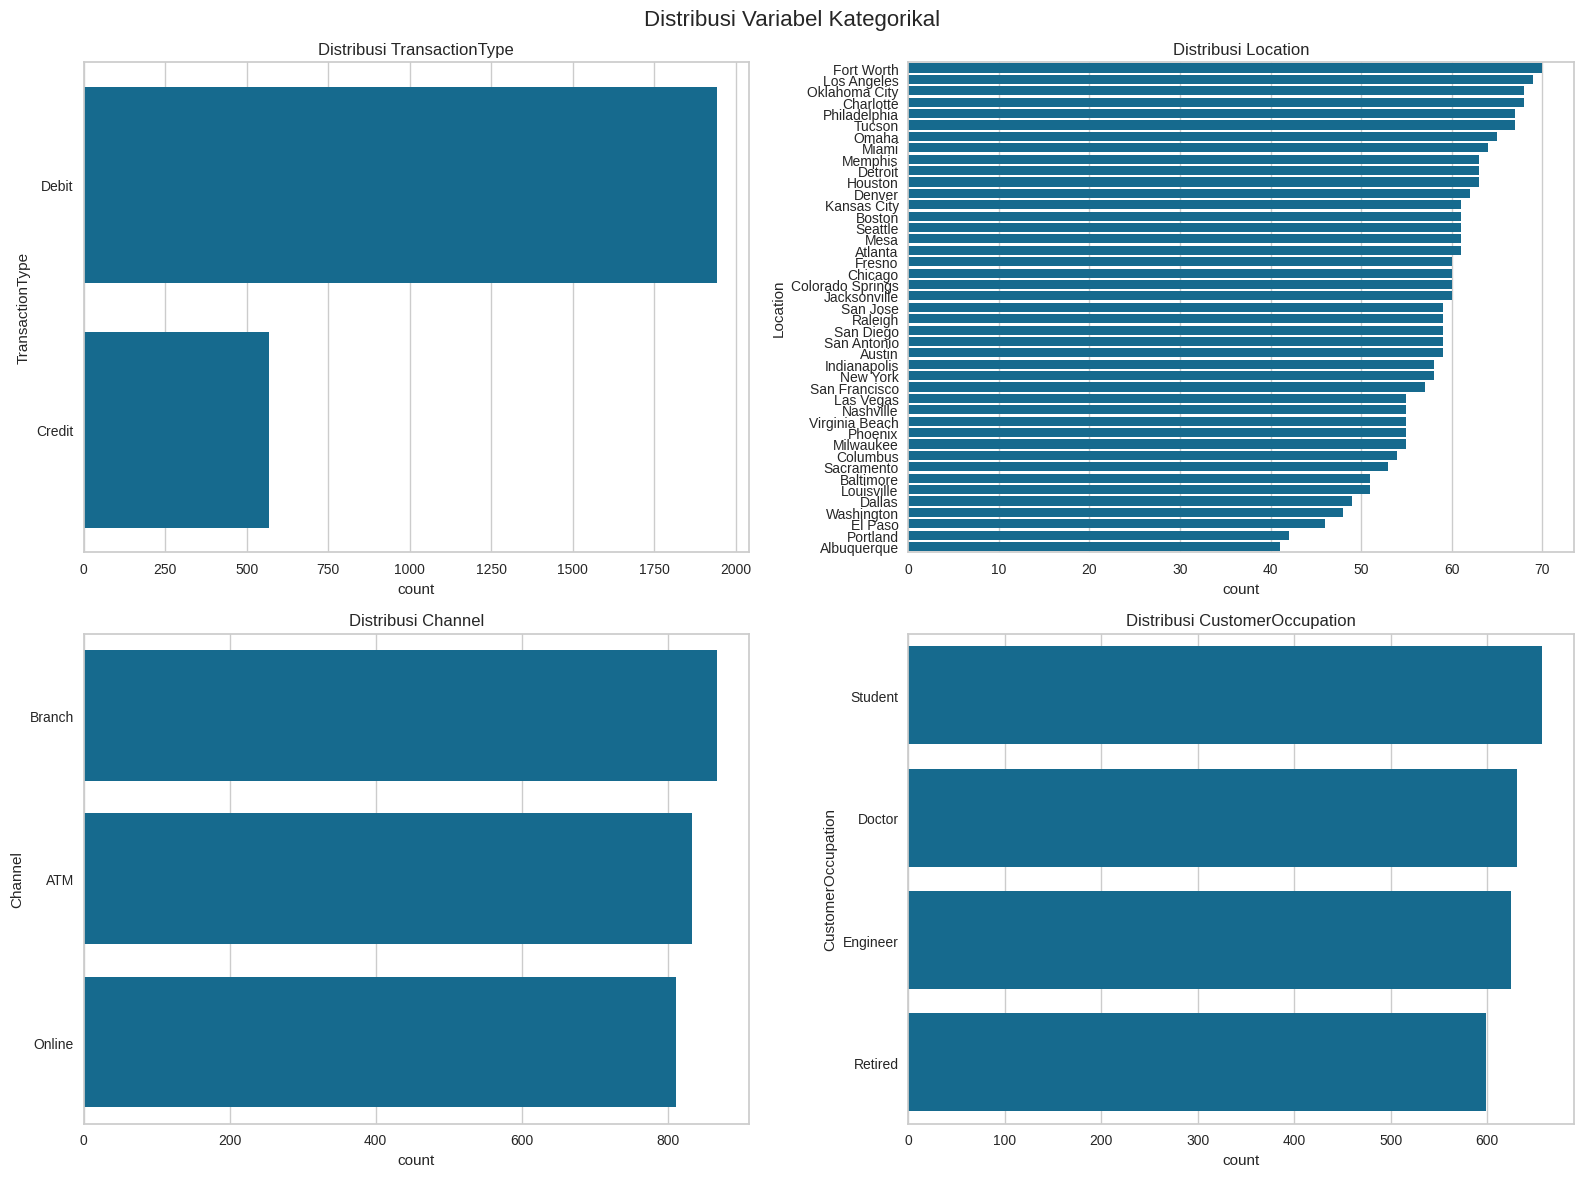

In [ ]:
# distribusi data fitur kategorikal
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Distribusi Variabel Kategorikal", fontsize=16)

for i, col in enumerate(categorical_columns):
    row, col_idx = divmod(i, 2)
    sns.countplot(y=fraud_df[col], order=fraud_df[col].value_counts().index, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

Distribusi data pada fitur kategorikal :
* TransactionType : lebih banyak penggunaan debit
* Location : 3 Lokasi transaksi terbanyak ada di wilayah Fort Worth, Los Angeles, dan Oklahoma City
* Channel : visualisasi data menunjukan transaksi terbanyak dilakukan di kantor cabang
* CustomerOccupation : lebih banyak murid/mahasiswa yang melakukan transaksi, dan paling sedikit transaksi dilakukan oleh pensiunan



In [ ]:
# melihat data unique
uniques_columns = ['DeviceID', 'IP Address', 'MerchantID']

for col in uniques_columns:
    print(f"Unique values in {col}: {fraud_df[col].unique()}")
    print("\n")

Unique values in DeviceID: ['D000380' 'D000051' 'D000235' 'D000187' 'D000308' 'D000579' 'D000241'
 'D000500' 'D000690' 'D000199' 'D000205' 'D000589' 'D000032' 'D000054'
 'D000309' 'D000466' 'D000671' 'D000432' 'D000530' 'D000039' 'D000152'
 'D000268' 'D000142' 'D000162' 'D000036' 'D000046' 'D000310' 'D000232'
 'D000297' 'D000587' 'D000282' 'D000621' 'D000111' 'D000357' 'D000042'
 'D000250' 'D000448' 'D000077' 'D000038' 'D000557' 'D000627' 'D000198'
 'D000197' 'D000685' 'D000103' 'D000397' 'D000284' 'D000304' 'D000661'
 'D000598' 'D000442' 'D000642' 'D000013' 'D000462' 'D000311' 'D000145'
 'D000089' 'D000233' 'D000285' 'D000516' 'D000548' 'D000461' 'D000098'
 'D000435' 'D000305' 'D000128' 'D000684' 'D000201' 'D000410' 'D000180'
 'D000295' 'D000231' 'D000073' 'D000070' 'D000363' 'D000561' 'D000375'
 'D000488' 'D000097' 'D000206' 'D000616' 'D000494' 'D000574' 'D000428'
 'D000018' 'D000453' 'D000141' 'D000322' 'D000481' 'D000526' 'D000645'
 'D000178' 'D000622' 'D000019' 'D000192' 'D000093'

Menampilkan nomor unik untuk setiap transaksi yang dilakukan

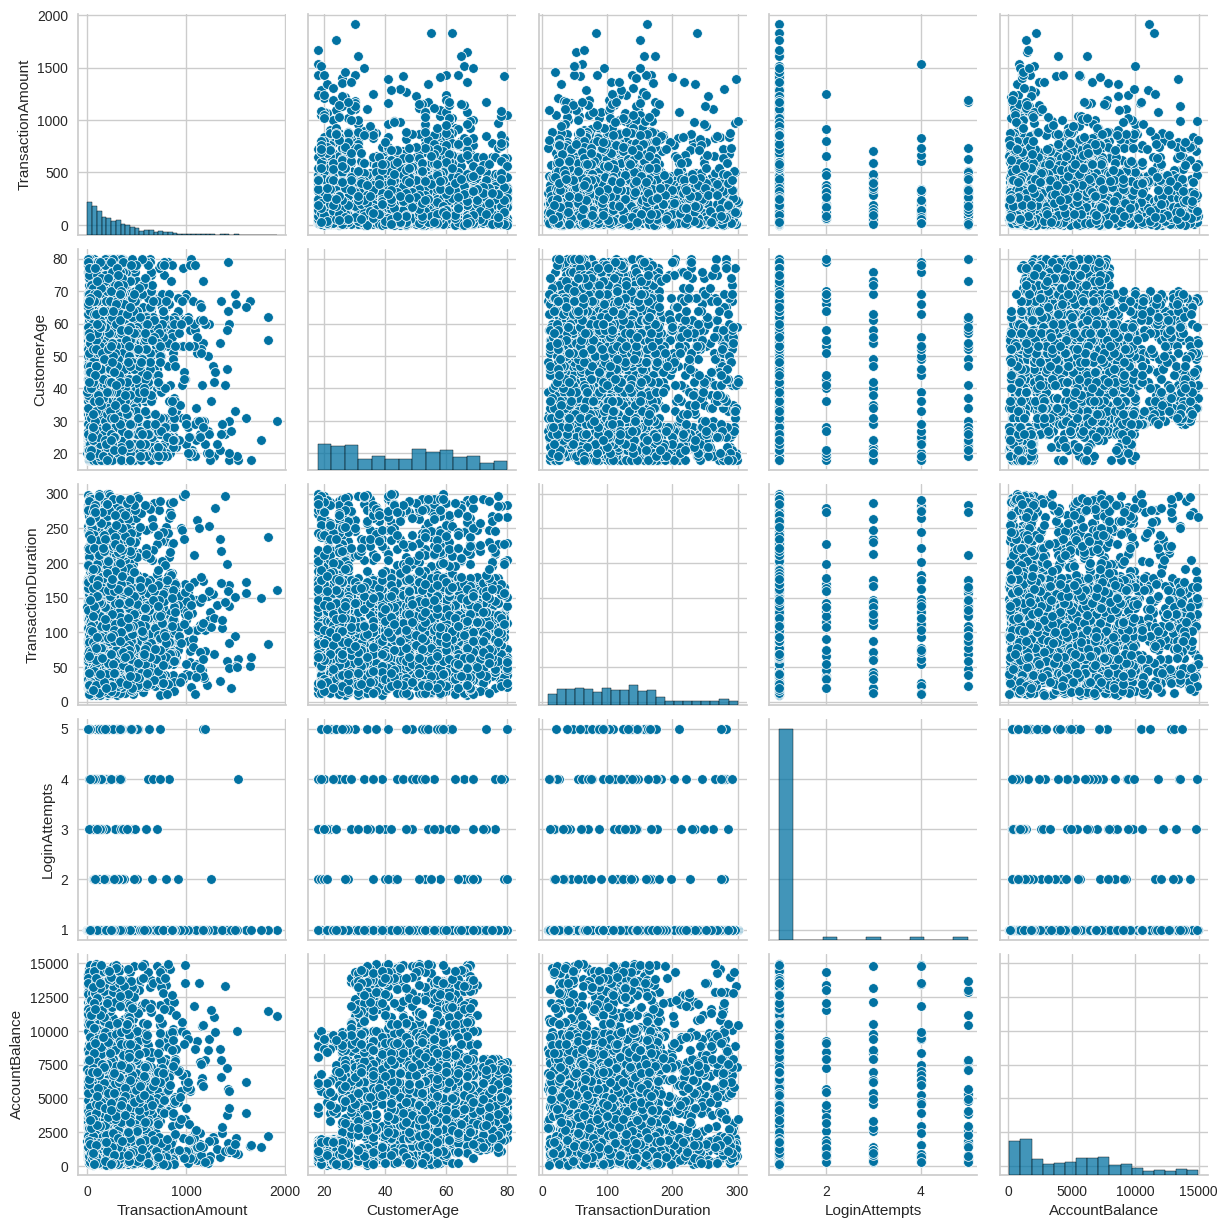

In [ ]:
#pairplot untuk menganalisis korelasi antar variabel.
sns.pairplot(fraud_df)
plt.show()

Pair plot untuk melihat korelasi setiap fitur numerik terhadap fitur numerik yang lainnya.

seperti AccountBalance vs CustomerAge yang memiliki korelasi paling tinggi pada visualisasi kebanyakan di umur 40-60 orang memiliki AccountBalance(simpanan uang di bank) yang lebih banyak dibanding lainnya

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# identifikasi data duplikat
print(f"Jumlah duplikasi data : {fraud_df.duplicated().sum()}")

Jumlah duplikasi data : 0


Jumlah duplikasi data juga kosong jadi kita tidak perlu melakukan tindakan lebih jauh.

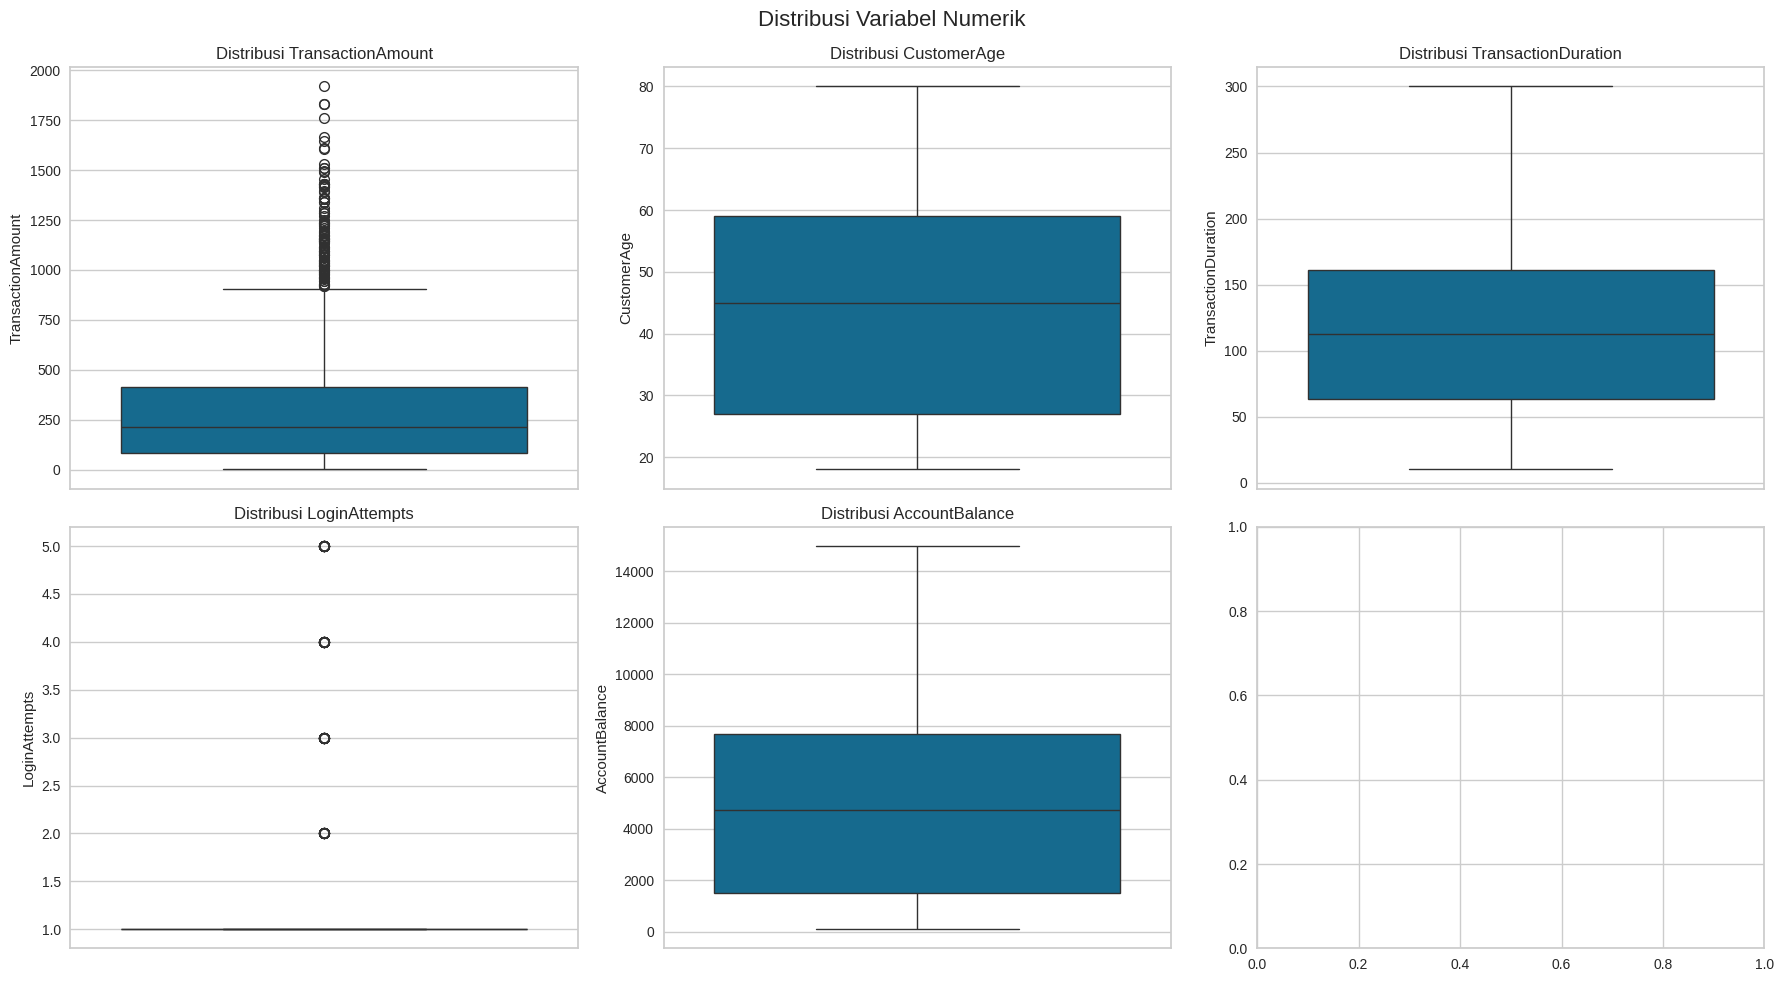

In [ ]:
# menggunakan boxplot untuk melihat outliers
numeric_columns = fraud_df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribusi Variabel Numerik", fontsize=16)

for i, col in enumerate(numeric_columns):
    row, col_idx = divmod(i, 3)
    sns.boxplot(fraud_df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

Terlihat terdapat outlier pada kolomo TransactionAmount dan Login Attempts

Mari kita lihat lebih dekat untuk kolom TransactionAmount..

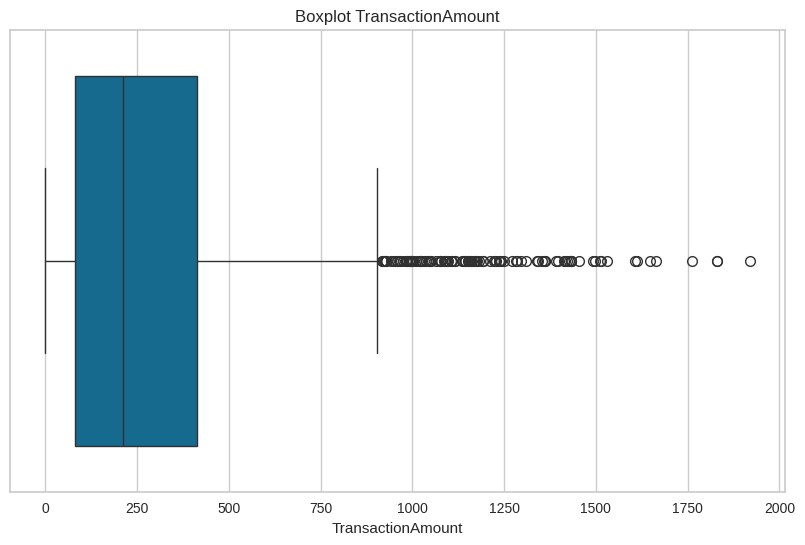

In [ ]:
# outliers pada kolom TransactionAmount
plt.figure(figsize=(10,6))
sns.boxplot(data=fraud_df, x='TransactionAmount')
plt.title('Boxplot TransactionAmount')
plt.show()

Titik-titik di luar whiskers(garis) → Menunjukkan outlier, yaitu transaksi dengan jumlah yang jauh lebih tinggi dibandingkan mayoritas data.

In [ ]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# detail outliers
outliers_summary = {}
for col in numeric_columns:
    outliers = detect_outliers(fraud_df, col)
    outliers_summary[col] = len(outliers)

outliers_summary

{'TransactionAmount': 113,
 'CustomerAge': 0,
 'TransactionDuration': 0,
 'LoginAttempts': 122,
 'AccountBalance': 0}

lebih detail lagi ada total 113 outlier pada kolom TransactionAmount, dan 122 outlier pada kolom LoginAttempts.

Outliers dalam dataset yang bertujuan untuk Fraud detection tidak perlu diubah/dihapus karna mungkin terdapat informasi penting yang dapat membantu potensi fraud.

In [ ]:
# feature engineering time series
fraud_df['TransactionHour'] = fraud_df['TransactionDate'].dt.hour  #jam

#binning data time series
fraud_df['TransactionTime'] = pd.cut(fraud_df['TransactionHour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

Membuat fitur untuk melihat waktu terbanyak dilakukan transaksi, dikelompokkan menjadi 4 yaitu Night, Morning, Afternoon, Evening

In [ ]:
# encoding menggunakan teknik label encoding hasil binning
label_encoder = LabelEncoder()
fraud_df['TransactionTime'] = label_encoder.fit_transform(fraud_df['TransactionTime'])

Melakukan encoding hasil binning data menggunakan teknik label encoding.

In [ ]:
# menambah fitur balance ratio dan jumlah percobaan login
fraud_df['BalanceRatio'] = fraud_df['TransactionAmount'] / (fraud_df['AccountBalance'] + 1e-9) #mencegah pembagian 0
fraud_df['LoginRatio'] = fraud_df['TransactionAmount'] / (fraud_df['LoginAttempts'] + 1e-9)

Membuat fitur tambahan untuk membantu fraud detection:
* BalanceRatio : rasio antara jumlah transaksi yang dilakukan dengan saldo akun.
* LoginRatio : rasio antara jumlah transaksi yang dilakukan dengan jumlah percobaan login

In [ ]:
# normalisasikan data pada fitur numerik
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
            'AccountBalance', 'LoginAttempts', 'BalanceRatio',
            'LoginRatio', 'TransactionHour', 'TransactionTime']

X = fraud_df[features]

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

Melakukan normalisasi fitur numerik menggunakan RobustScaler

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# menggunakan PCA untuk mengurangi dimensi
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

Menerapkan PCA untuk mengurangi dimensi data hasil normalisasi dari RobustScaler

In [ ]:
# algoritma Kmeans
cluster_range = range(2, 10)
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    silhouette_scores.append(sil_score)
    print(f"K-Means Clustering with K={k} - Silhouette Score: {sil_score:.2f}")

K-Means Clustering with K=2 - Silhouette Score: 0.84
K-Means Clustering with K=3 - Silhouette Score: 0.77
K-Means Clustering with K=4 - Silhouette Score: 0.50
K-Means Clustering with K=5 - Silhouette Score: 0.44
K-Means Clustering with K=6 - Silhouette Score: 0.44
K-Means Clustering with K=7 - Silhouette Score: 0.45
K-Means Clustering with K=8 - Silhouette Score: 0.37
K-Means Clustering with K=9 - Silhouette Score: 0.38


In [ ]:
# algoritma DBSCAN
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [5, 10, 15, 20, 25]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)
        sil_score = silhouette_score(X_pca, labels)
        print(f"DBSCAN with eps={eps}, min_samples={min_samples} - Silhouette Score: {sil_score:.2f}")

DBSCAN with eps=0.1, min_samples=5 - Silhouette Score: -0.27
DBSCAN with eps=0.1, min_samples=10 - Silhouette Score: -0.20
DBSCAN with eps=0.1, min_samples=15 - Silhouette Score: -0.27
DBSCAN with eps=0.1, min_samples=20 - Silhouette Score: -0.27
DBSCAN with eps=0.1, min_samples=25 - Silhouette Score: -0.35
DBSCAN with eps=0.2, min_samples=5 - Silhouette Score: 0.06
DBSCAN with eps=0.2, min_samples=10 - Silhouette Score: 0.02
DBSCAN with eps=0.2, min_samples=15 - Silhouette Score: 0.12
DBSCAN with eps=0.2, min_samples=20 - Silhouette Score: 0.10
DBSCAN with eps=0.2, min_samples=25 - Silhouette Score: 0.06
DBSCAN with eps=0.3, min_samples=5 - Silhouette Score: 0.06
DBSCAN with eps=0.3, min_samples=10 - Silhouette Score: 0.12
DBSCAN with eps=0.3, min_samples=15 - Silhouette Score: 0.15
DBSCAN with eps=0.3, min_samples=20 - Silhouette Score: 0.17
DBSCAN with eps=0.3, min_samples=25 - Silhouette Score: 0.17
DBSCAN with eps=0.4, min_samples=5 - Silhouette Score: 0.11
DBSCAN with eps=0.4, mi

Berdasarkan uji coba algoritma Kmeans dan DBSCAN di peroleh silhoutte score tertinggi dimenangkan oleh Kmeans di setiap iterasinya.

Selanjutnya mari kita cek untuk nilai K (cluster) terbaik

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

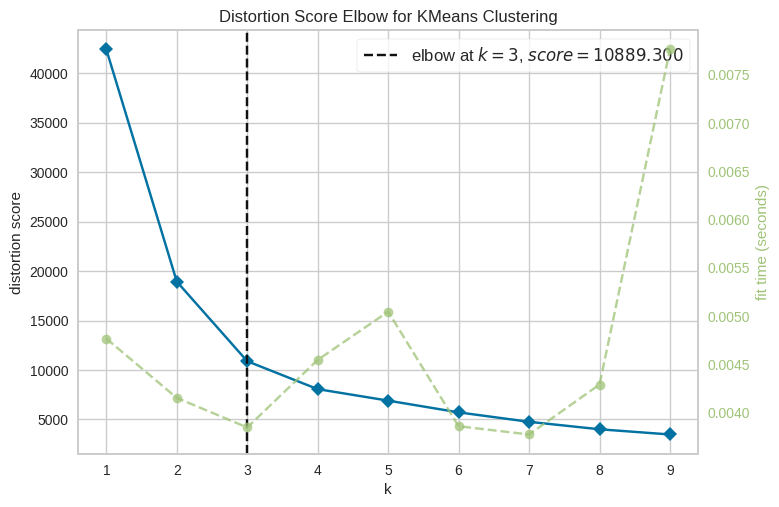

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# menggunakan Elbow Method untuk mencari nilai K optimal
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_pca)
visualizer.show()

Berdasarkan hasil fungsi KElbowVisualizer diperoleh nilai K (cluster) terbaik adalah 3. mari kita terapkan dan memulai training...

In [ ]:
# Aplikasikan nilai K optimal sesuai elbow method menggunakan Kmeans algorithm
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=20, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
fraud_df['KMeans_Cluster'] = kmeans_labels

# evaluasi silhoutte score
sil_score = silhouette_score(X_pca, kmeans_labels)
print(f"Optimal K-Means Silhouette Score: {sil_score:.2f}")

Optimal K-Means Silhouette Score: 0.77


Menggunakan K-Means kita memperoleh silhoutte score sebesar : 0.77 dengan jumlah nilai K = 3

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
# menghitung jarak setiap titik dengan centroid
distances = np.linalg.norm(X_pca - kmeans.cluster_centers_[kmeans_labels], axis=1)

# membuat ambang batas
mean_distance = distances.mean()
std_distance = distances.std()
threshold = mean_distance + 2 * std_distance
fraud_df['Potential_Fraud'] = distances > threshold

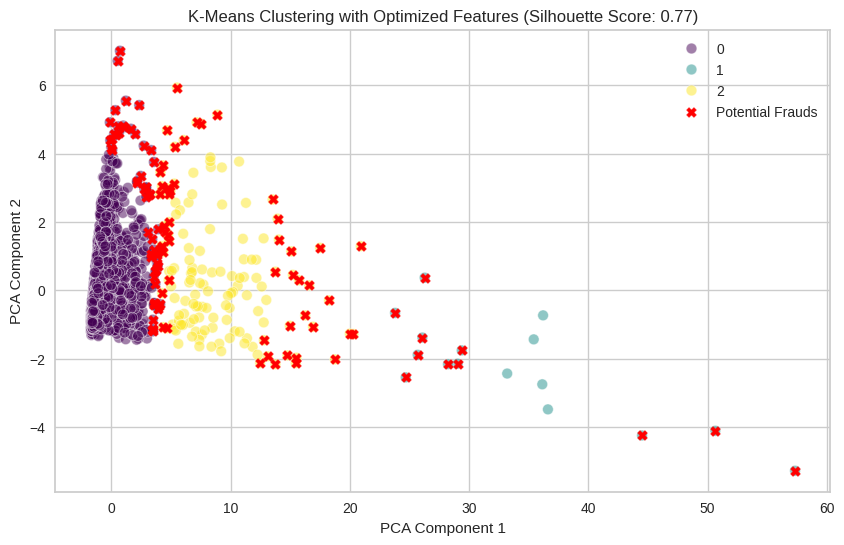

Jumlah potensi penipuan yang terdeteksi (K-Means): 115


In [ ]:
# visualisasi scatter
pca_2d = PCA(n_components=2)
reduced_data = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(reduced_data[distances > threshold, 0], reduced_data[distances > threshold, 1],
            color='red', s=50, label='Potential Frauds', marker='X')
plt.title(f'K-Means Clustering with Optimized Features (Silhouette Score: {sil_score:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# jumlah potensi penipuan
frauds = fraud_df[fraud_df['Potential_Fraud']]
print(f"Jumlah potensi penipuan yang terdeteksi (K-Means): {len(frauds)}")

Berdasarkan hasil clustering terdapat 3 cluster dan 115 potensi penipuan menggunakan algoritma K-Means

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Inversi data kembali ke skala aslinya
X_original = scaler.inverse_transform(X_scaled)

# Masukkan kembali ke dalam DataFrame
result_df = pd.DataFrame(X_original, columns=features)

# Menambahkan fitur yang sudah dilabeli
result_df['KMeans_Cluster'] = fraud_df['KMeans_Cluster']
result_df['Potential_Fraud'] = fraud_df['Potential_Fraud']

# Lihat hasil inversi pada beberapa data pertama
result_df

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,LoginAttempts,BalanceRatio,LoginRatio,TransactionHour,TransactionTime,KMeans_Cluster,Potential_Fraud
0,14.09,70.0,81.0,5112.21,1.0,0.002756,14.090000,16.0,0.0,0,False
1,376.24,68.0,141.0,13758.91,1.0,0.027345,376.240000,16.0,0.0,0,False
2,126.29,19.0,56.0,1122.35,1.0,0.112523,126.290000,18.0,0.0,0,False
3,184.50,26.0,25.0,8569.06,1.0,0.021531,184.500000,16.0,0.0,0,False
4,13.45,26.0,198.0,7429.40,1.0,0.001810,13.450000,17.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,33.0,109.0,12690.79,1.0,0.067467,856.209999,17.0,0.0,0,False
2508,251.54,48.0,177.0,254.75,1.0,0.987399,251.540000,17.0,0.0,2,False
2509,28.63,56.0,146.0,3382.91,1.0,0.008463,28.630000,17.0,0.0,0,False
2510,185.97,23.0,19.0,1776.91,1.0,0.104659,185.970000,16.0,0.0,0,False


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# distribusi nilai mean (rata-rata) tiap cluster
cluster_analysis = fraud_df.groupby('KMeans_Cluster').agg({
    'TransactionAmount':['mean', 'min', 'max'],
    'CustomerAge':['mean', 'min', 'max'],
    'TransactionDuration':['mean', 'min', 'max'],
    'AccountBalance':['mean', 'min', 'max'],
    'LoginAttempts':['mean', 'min', 'max'],
    'BalanceRatio':['mean', 'min', 'max'],
    'LoginRatio':['mean', 'min', 'max'],
    'TransactionHour':['mean', 'min', 'max'],
    'TransactionTime':['mean', 'min', 'max'],
    'KMeans_Cluster':['mean', 'min', 'max'],
    'Potential_Fraud': lambda x: (x.sum() / len(x)) * 100  # Persentase fraud di cluster
}).round(2)

# Menambahkan jumlah dan persentase data di tiap cluster
cluster_sizes = fraud_df['KMeans_Cluster'].value_counts()
cluster_analysis['Count'] = cluster_sizes
cluster_analysis['Size_Percent'] = (cluster_sizes / len(fraud_df) * 100).round(2)

print("Distribusi nilai mean (rata-rata) tiap cluster:")
print(cluster_analysis)

Distribusi nilai mean (rata-rata) tiap cluster:
               TransactionAmount                  CustomerAge          \
                            mean     min      max        mean min max   
KMeans_Cluster                                                          
0                         268.81    0.26  1919.11       45.67  18  80   
1                         831.07  459.25  1221.65       31.12  19  64   
2                         708.37  124.59  1830.00       29.92  18  78   

               TransactionDuration          AccountBalance  ...  \
                              mean min  max           mean  ...   
KMeans_Cluster                                              ...   
0                           119.40  10  300        5423.46  ...   
1                           113.69  11  244         186.76  ...   
2                           124.33  11  289         612.30  ...   

               TransactionHour TransactionTime         KMeans_Cluster          \
                           ma

susah ya untuk dilihat jika menampilkan 3 fungsi agregasi sekaligus, berikutnya coba kita ambil nilai rata rata nya saja..

In [ ]:
# distribusi nilai mean (rata-rata) tiap cluster
cluster_analysis = fraud_df.groupby('KMeans_Cluster').agg({
    'TransactionAmount':'mean',
    'CustomerAge':'mean',
    'TransactionDuration':'mean',
    'AccountBalance':'mean',
    'LoginAttempts':'mean',
    'BalanceRatio':'mean',
    'LoginRatio':'mean',
    'TransactionHour':'mean',
    'TransactionTime':'mean',
    'KMeans_Cluster':'mean',
    'Potential_Fraud': lambda x: (x.sum() / len(x)) * 100  # Persentase fraud di cluster
}).round(2)

# Menambahkan jumlah dan persentase data di tiap cluster
cluster_sizes = fraud_df['KMeans_Cluster'].value_counts()
cluster_analysis['Count'] = cluster_sizes
cluster_analysis['Size_Percent'] = (cluster_sizes / len(fraud_df) * 100).round(2)

print("Distribusi nilai mean (rata-rata) tiap cluster:")
print(cluster_analysis)

Distribusi nilai mean (rata-rata) tiap cluster:
                TransactionAmount  CustomerAge  TransactionDuration  \
KMeans_Cluster                                                        
0                          268.81        45.67               119.40   
1                          831.07        31.12               113.69   
2                          708.37        29.92               124.33   

                AccountBalance  LoginAttempts  BalanceRatio  LoginRatio  \
KMeans_Cluster                                                            
0                      5423.46           1.13          0.10      260.05   
1                       186.76           1.25          4.74      772.26   
2                       612.30           1.08          1.37      691.35   

                TransactionHour  TransactionTime  KMeans_Cluster  \
KMeans_Cluster                                                     
0                         16.63              0.0             0.0   
1               

Oke kita ambil 3 contoh fitur pertama, berdasarkan clusternya dibagi menjadi :
* Cluster 0:

Transaksi rata-rata sebesar 268.81.

Usia pelanggan rata-rata 45.67 tahun.

Rata-rata durasi transaksi 119.40 detik.

* Cluster 1:

Transaksi rata-rata lebih besar (831.07).

Usia pelanggan lebih muda (31.12 tahun).

Durasi transaksi sedikit lebih singkat (113.69 detik).

* Cluster 2:

Transaksi rata-rata (708.37) masih tinggi tetapi di bawah cluster 1.

Usia pelanggan paling muda (29.92 tahun).

Durasi transaksi paling lama (124.33 detik).

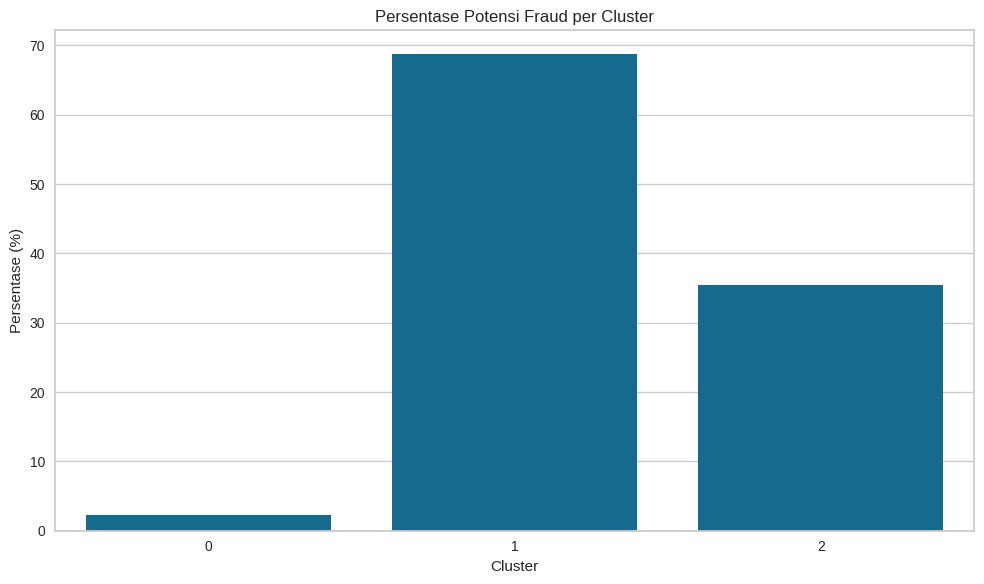

In [ ]:
# visualisasi rasio fraud per cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['Potential_Fraud'])
plt.title('Persentase Potensi Fraud per Cluster')
plt.ylabel('Persentase (%)')
plt.xlabel('Cluster')
plt.tight_layout()
plt.savefig('fraud_ratio_per_cluster.png')
plt.show()

* Cluster 1 adalah cluster yang paling berisiko karena mayoritas transaksi dalam cluster ini terindikasi sebagai fraud.

* Cluster 0 kemungkinan besar terdiri dari transaksi normal karena sangat sedikit yang dicurigai sebagai fraud.

* Cluster 2 berada di tengah-tengah namun terdapat indikasi fraud, tetapi tidak sebanyak cluster 1.

In [ ]:
# karakteristik transaksi yang terdeteksi sebagai potensi fraud
print("\nKarakteristik Transaksi Berpotensi Fraud:")
fraud_characteristics = fraud_df[fraud_df['Potential_Fraud']].describe().round(2)
print(fraud_characteristics)


Karakteristik Transaksi Berpotensi Fraud:
       TransactionAmount                TransactionDate  CustomerAge  \
count             115.00                            115       115.00   
mean              911.62  2023-06-30 18:03:30.313043712        36.56   
min               138.68            2023-01-05 16:43:14        18.00   
25%               600.90     2023-04-15 05:03:44.500000        22.00   
50%               859.30            2023-06-26 18:25:14        26.00   
75%              1236.62     2023-09-25 17:06:37.500000        53.00   
max              1919.11            2023-12-25 17:41:30        80.00   
std               440.09                            NaN        18.01   

       TransactionDuration  LoginAttempts  AccountBalance  \
count               115.00         115.00          115.00   
mean                122.88           1.06         2024.00   
min                  11.00           1.00          101.25   
25%                  64.50           1.00          324.42   
50%

**Karakteristik Transaksi Berpotensi Fraud**  
Analisis statistik terhadap transaksi yang terindikasi sebagai fraud menunjukkan beberapa karakteristik utama berdasarkan berbagai parameter transaksi.  

1. **Nilai Transaksi (TransactionAmount)**  
   - Rata-rata nilai transaksi yang mencurigakan adalah 911.62 USD, dengan transaksi terkecil sebesar 138.68 USD dan terbesar mencapai 1919.11 USD.  
   - Sebagian besar transaksi berada dalam rentang 600.90 - 1236.62.  

2. **Waktu dan Frekuensi Transaksi**  
   - Mayoritas transaksi terjadi pada pukul 16:00 - 18:00.  
   - Durasi transaksi bervariasi dengan rata-rata 122.88 detik, tetapi bisa mencapai hingga 297 detik.  

3. **Profil Pelanggan**  
   - Usia pelanggan yang terlibat dalam transaksi fraud rata-rata berusia 36 tahun.  

4. **Atribut Keamanan Akun**  
   - Jumlah upaya login umumnya 1 kali, tetapi ada beberapa kasus hingga 5 kali percobaan login.  

5. **Riwayat dan Pola Transaksi**  
   - Waktu transaksi sebelumnya dalam dataset cenderung berdekatan, menunjukkan kemungkinan adanya pola transaksi yang cepat dan berulang.  
   - Nilai rata-rata Balance Ratio adalah 1.33, yang mengindikasikan bahwa beberapa transaksi memiliki rasio saldo terhadap jumlah transaksi yang signifikan.

In [44]:
# interpretasi hasil clustering
for cluster in sorted(fraud_df["KMeans_Cluster"].unique()):
    cluster_data = fraud_df[fraud_df["KMeans_Cluster"] == cluster]

    print(f"### Cluster {cluster}:")
    print(f"- Jumlah Transaksi: {len(cluster_data)}")
    print(f"- Rata-rata Transaction Amount: {cluster_data['TransactionAmount'].mean():,.2f}")
    print(f"- Rata-rata Customer Age: {cluster_data['CustomerAge'].mean():.0f}")
    print(f"- Rata-rata Transaction Duration: {cluster_data['TransactionDuration'].mean():.2f} detik")
    print(f"- Rata-rata Account Balance: {cluster_data['AccountBalance'].mean():,.2f}")
    print(f"- Rata-rata Login Attempts: {cluster_data['LoginAttempts'].mean():.2f}")
    print(f"- Rata-rata Balance Ratio: {cluster_data['BalanceRatio'].mean():.2f}")
    print(f"- Rata-rata Login Ratio: {cluster_data['LoginRatio'].mean():,.2f}")
    print(f"- Rata-rata Transaction Hour: {cluster_data['TransactionHour'].mean():.2f}")
    print(f"- Rata-rata Potential Fraud: {cluster_data['Potential_Fraud'].mean() * 100:.2f}%")
    print("\n" + "-"*50 + "\n")

### Cluster 0:
- Jumlah Transaksi: 2352
- Rata-rata Transaction Amount: 268.81
- Rata-rata Customer Age: 46
- Rata-rata Transaction Duration: 119.40 detik
- Rata-rata Account Balance: 5,423.46
- Rata-rata Login Attempts: 1.13
- Rata-rata Balance Ratio: 0.10
- Rata-rata Login Ratio: 260.05
- Rata-rata Transaction Hour: 16.63
- Rata-rata Potential Fraud: 2.25%

--------------------------------------------------

### Cluster 1:
- Jumlah Transaksi: 16
- Rata-rata Transaction Amount: 831.07
- Rata-rata Customer Age: 31
- Rata-rata Transaction Duration: 113.69 detik
- Rata-rata Account Balance: 186.76
- Rata-rata Login Attempts: 1.25
- Rata-rata Balance Ratio: 4.74
- Rata-rata Login Ratio: 772.26
- Rata-rata Transaction Hour: 16.69
- Rata-rata Potential Fraud: 68.75%

--------------------------------------------------

### Cluster 2:
- Jumlah Transaksi: 144
- Rata-rata Transaction Amount: 708.37
- Rata-rata Customer Age: 30
- Rata-rata Transaction Duration: 124.33 detik
- Rata-rata Account B

hasil interpretasinya :
1. Cluster 0 :

**Rata-rata** TransactionAmount: 268.81

**Rata-rata** CustomerAge: 45.67

**Rata-rata** TransactionDuration: 119.40 detik

**Rata-rata** AccountBalance: 5,423.46

**Rata-rata** LoginAttempts: 1.13

**Rata-rata** BalanceRatio: 0.10

**Rata-rata** AmountPerLogin: 260.05

**Rata-rata** TransactionHour: 16.63

**Rata-rata** Potential Fraud: 2.25%

**Analisis :**
Cluster ini merupakan kelompok terbesar dengan hampir seluruh transaksi berada di dalamnya. Transaksi dalam cluster ini memiliki nilai relatif kecil dengan saldo akun yang besar, yang menunjukkan pola transaksi yang stabil dan normal. Dengan balance ratio yang sangat rendah, pengguna di cluster ini hanya menggunakan sebagian kecil dari saldo mereka untuk bertransaksi. Jumlah percobaan login juga rendah, yang mengindikasikan penggunaan akun yang sah tanpa indikasi aktivitas mencurigakan. Persentase fraud sangat rendah, hanya 2.25%, yang menunjukkan bahwa cluster ini terdiri dari akun-akun legitimate dengan pola transaksi yang wajar dan aman.

2. Cluster 1:
**Rata-rata** TransactionAmount: 831.07

**Rata-rata** CustomerAge: 31.12

**Rata-rata** TransactionDuration: 113.69 detik

**Rata-rata** AccountBalance: 186.76

**Rata-rata** LoginAttempts: 1.25

**Rata-rata** BalanceRatio: 4.74

**Rata-rata** AmountPerLogin: 772.26

**Rata-rata** TransactionHour: 16.69

**Rata-rata** Potential Fraud: 68.75%

**Analisis :**
Cluster ini memiliki jumlah transaksi yang sangat kecil, namun tingkat potensi fraud yang sangat tinggi, mencapai 68.75%. Nilai transaksi dalam cluster ini sangat besar, tetapi saldo akun rata-rata sangat rendah, menunjukkan bahwa pengguna dalam kelompok ini mencoba melakukan transaksi yang jauh lebih besar dibandingkan saldo yang mereka miliki. Balance ratio yang tinggi mengindikasikan bahwa hampir seluruh saldo dalam akun langsung digunakan untuk transaksi besar, yang sering kali merupakan indikasi aktivitas mencurigakan. Selain itu, nilai transaksi per login juga sangat tinggi, yang bisa menunjukkan bahwa akun dalam cluster ini dibuat untuk melakukan transaksi besar dalam waktu singkat. Berdasarkan karakteristik ini, cluster ini kemungkinan besar berisi akun dengan aktivitas fraud yang sangat tinggi dan perlu pengawasan lebih lanjut.

3. Cluster 2:
**Rata-rata** TransactionAmount: 708.37

**Rata-rata** CustomerAge: 29.92

**Rata-rata** TransactionDuration: 124.33 detik

**Rata-rata** AccountBalance: 612.30

**Rata-rata** LoginAttempts: 1.08

**Rata-rata** BalanceRatio: 1.37

**Rata-rata** AmountPerLogin: 691.35

**Rata-rata** TransactionHour: 16.63

**Rata-rata** Potential Fraud: 35.42%

**Analisis :**
Cluster ini memiliki jumlah transaksi yang lebih banyak dibandingkan Cluster 1, tetapi jauh lebih sedikit dibandingkan Cluster 0. Nilai transaksi cukup besar, tetapi tidak sebesar dalam Cluster 1, dan saldo akun berada di tingkat menengah. Balance ratio yang sedang menunjukkan bahwa pengguna dalam kelompok ini menggunakan saldo mereka dalam jumlah yang cukup besar untuk transaksi, namun tidak sepenuhnya menghabiskan saldo mereka seperti yang terlihat di Cluster 1. Jumlah percobaan login juga rendah, yang berarti akun dalam cluster ini tidak mengalami banyak kegagalan login sebelum melakukan transaksi. Potensi fraud dalam cluster ini cukup tinggi, sekitar 35.42%, yang mengindikasikan bahwa meskipun tidak seburuk Cluster 1, transaksi dalam kelompok ini masih perlu diperiksa lebih lanjut untuk mendeteksi kemungkinan aktivitas mencurigakan.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan hasil dalam format CSV
result_df.to_csv("Dataset_clustering.csv", index=False)

print("Data hasil clustering dan deteksi fraud telah disimpan sebagai 'Dataset_clustering.csv'")

Data hasil clustering dan deteksi fraud telah disimpan sebagai 'Dataset_clustering.csv'
